In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv("survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [7]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [9]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


if not duplicate_rows.empty:
    print("Duplicate rows found:\n", duplicate_rows)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 33
Duplicate rows found:
      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
99        1   56        2               1        1              1   
100       1   58        2               1        1              1   
117       0   51        2               2        2              2   
199       0   55        2               1        1              2   
212       1   58        2               1        1              1   
223       1   63        2               2        2              1   
256       1   60        2               1        1              1   
275       1   64        2               2        2              2   
284       1   58        2               2        2              2   
285       0   58        2               2        2              2   
286       0   63        1               1        1              1   
287       0   51        2               2        2              2   
288       0   61        1               2        2 

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [12]:
X = df.drop(['LUNG_CANCER'], axis=1)  
y = df['LUNG_CANCER']

 Normalize the data using Z-score normalization


In [13]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply Anomaly Detection Methods

 1. Z-Score Based Anomaly Detection

In [14]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X_scaled))
threshold = 3
z_outliers = (z_scores > threshold).any(axis=1)

print("Z-Score Anomalies:", np.where(z_outliers)[0])


Z-Score Anomalies: [22]


 2. Mahalanobis Distance

In [15]:
from scipy.spatial import distance

mean = np.mean(X_scaled, axis=0)
cov = np.cov(X_scaled, rowvar=False)
inv_covmat = np.linalg.inv(cov)

mahal_dist = [distance.mahalanobis(x, mean, inv_covmat) for x in X_scaled]
threshold = np.percentile(mahal_dist, 97)
mahal_outliers = [i for i, dist in enumerate(mahal_dist) if dist > threshold]

print("Mahalanobis Anomalies:", mahal_outliers)


Mahalanobis Anomalies: [22, 44, 46, 144, 224, 232, 236, 249, 254]


 3. Local Outlier Factor (LOF)

In [16]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
y_pred_lof = lof.fit_predict(X_scaled)
lof_outliers = np.where(y_pred_lof == -1)[0]

print("LOF Anomalies:", lof_outliers)


LOF Anomalies: []


4. Isolation Forest

In [17]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_scaled)
iso_outliers = np.where(y_pred_iso == -1)[0]

print("Isolation Forest Anomalies:", iso_outliers)


Isolation Forest Anomalies: [  1  31  36  37  38  44  46  47  90  97 116 120 144 150 153 154 156 190
 195 196 203 224 227 234 236 237 249 274]


 5. One-Class SVM

In [18]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
y_pred_svm = oc_svm.fit_predict(X_scaled)
svm_outliers = np.where(y_pred_svm == -1)[0]

print("One-Class SVM Anomalies:", svm_outliers)


One-Class SVM Anomalies: [  0   7  15  20  22  28  37  38  49  55  57  68  69  92  99 106 112 117
 123 130 132 137 138 156 159 165 170 195 217 224 227 228 231 232 233 234
 249 252 254 255 269 274]


In [27]:
# Encode labels: YES = 1 (anomaly), NO = 0 (normal)
y_true = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0).values


In [60]:
df['LUNG_CANCER'].value_counts()


LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

In [61]:
# Treat 'NO' as anomaly (since it's rare in this dataset)
y_true = df['LUNG_CANCER'].apply(lambda x: 1 if x == 0 else 0).values


visualization

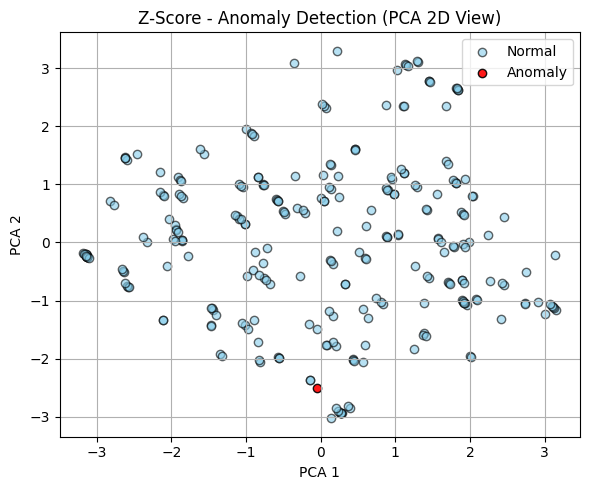

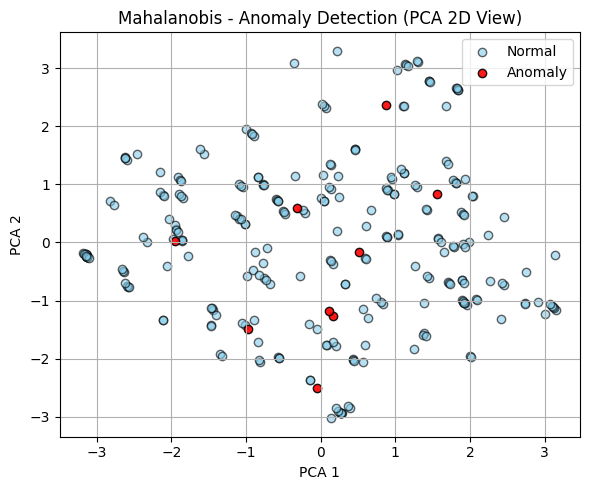

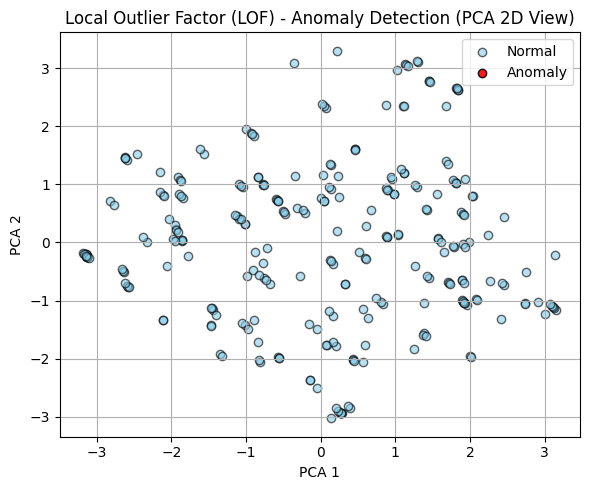

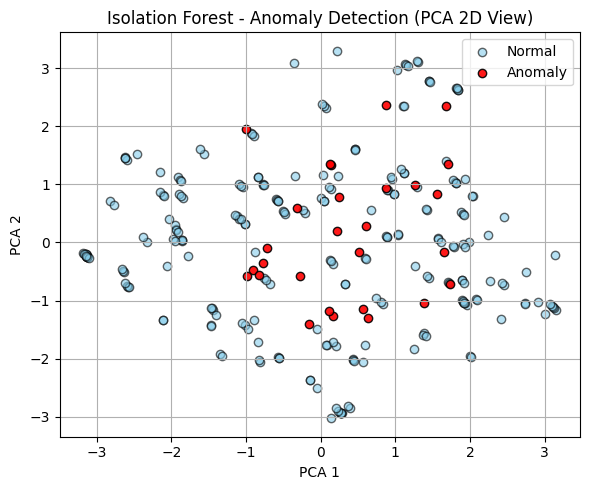

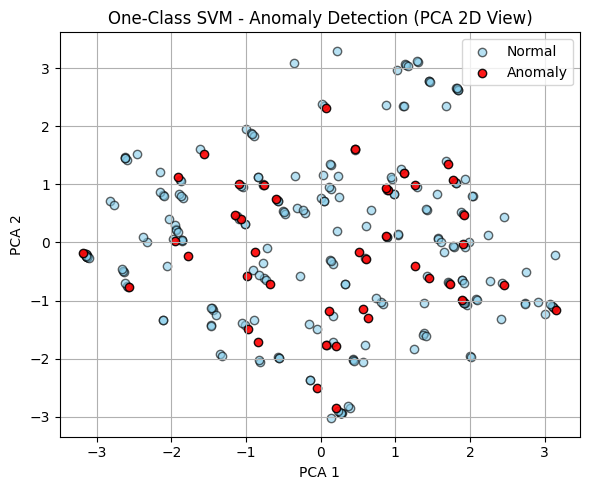

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['LUNG_CANCER']) 
X_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


def plot_anomalies_2d(pca_data, anomaly_mask, method_name):
    plt.figure(figsize=(6, 5))
    plt.title(f"{method_name} - Anomaly Detection (PCA 2D View)")
    
    
    plt.scatter(pca_data[~anomaly_mask, 0], pca_data[~anomaly_mask, 1],
                c='skyblue', label='Normal', alpha=0.6, edgecolors='k')
    
    
    plt.scatter(pca_data[anomaly_mask, 0], pca_data[anomaly_mask, 1],
                c='red', label='Anomaly', alpha=0.9, edgecolors='k')
    
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_anomalies_2d(X_pca, z_outliers.astype(bool), "Z-Score")
plot_anomalies_2d(X_pca, mahal_outliers.astype(bool), "Mahalanobis")
plot_anomalies_2d(X_pca, lof_outliers.astype(bool), "Local Outlier Factor (LOF)")
plot_anomalies_2d(X_pca, iso_outliers.astype(bool), "Isolation Forest")
plot_anomalies_2d(X_pca, svm_outliers.astype(bool), "One-Class SVM")


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, method_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n📊 {method_name} Evaluation")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")

    return {
        "Method": method_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


In [64]:
results = []

results.append(evaluate_model(y_true, z_outliers, "Z-Score"))
results.append(evaluate_model(y_true, mahal_outliers, "Mahalanobis"))
results.append(evaluate_model(y_true, lof_outliers, "LOF"))
results.append(evaluate_model(y_true, iso_outliers, "Isolation Forest"))
results.append(evaluate_model(y_true, svm_outliers, "One-Class SVM"))

# Convert to DataFrame
df_results = pd.DataFrame(results)
print("\n📈 Evaluation Summary:")
print(df_results.sort_values(by="F1 Score", ascending=False))



📊 Z-Score Evaluation
Accuracy : 0.866
Precision: 1.000
Recall   : 0.026
F1 Score : 0.051

📊 Mahalanobis Evaluation
Accuracy : 0.837
Precision: 0.111
Recall   : 0.026
F1 Score : 0.043

📊 LOF Evaluation
Accuracy : 0.862
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000

📊 Isolation Forest Evaluation
Accuracy : 0.812
Precision: 0.250
Recall   : 0.184
F1 Score : 0.212

📊 One-Class SVM Evaluation
Accuracy : 0.761
Precision: 0.167
Recall   : 0.184
F1 Score : 0.175

📈 Evaluation Summary:
             Method  Accuracy  Precision    Recall  F1 Score
3  Isolation Forest  0.811594   0.250000  0.184211  0.212121
4     One-Class SVM  0.760870   0.166667  0.184211  0.175000
0           Z-Score  0.865942   1.000000  0.026316  0.051282
1       Mahalanobis  0.836957   0.111111  0.026316  0.042553
2               LOF  0.862319   0.000000  0.000000  0.000000


In [66]:
import pandas as pd

df_results = pd.DataFrame(results)
df_results.sort_values(by='F1 Score', ascending=False)

,Method,Accuracy,Precision,Recall,F1 Score
3,Isolation Forest,0.811594,0.250000,0.184211,0.212121
4,One-Class SVM,0.760870,0.166667,0.184211,0.175000
0,Z-Score,0.865942,1.000000,0.026316,0.051282
1,Mahalanobis,0.836957,0.111111,0.026316,0.042553
2,LOF,0.862319,0.000000,0.000000,0.000000
